In [1]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

292 4231


python/smoothn.py:186: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
python/smoothn.py:204: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


0.0201514343421


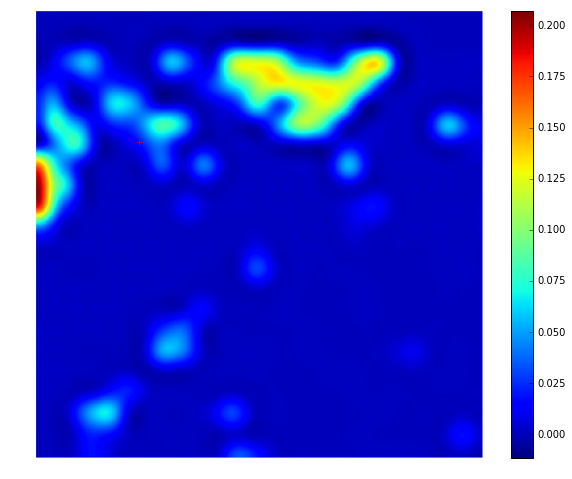

In [4]:
data = parallel_rw_pkl(None, 'USGS0304_atm', 'r')
lat, lon =35.215,-111.63389
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [6]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160304_160321_USGS_Flagstaff_ROLO.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,06:03:2016,15:45:46,66.656782,0.011456,0.021040,0.021494,0.023297,NaN,NaN,NaN,NaN,NaN,0.036346,NaN,NaN,0.043105,NaN,0.048292,0.043175,0.738800
1,06:03:2016,20:50:12,66.868194,0.024929,0.036594,0.039780,0.044198,NaN,NaN,NaN,NaN,NaN,0.063287,NaN,NaN,0.071243,NaN,0.080655,0.073577,0.573431
2,06:03:2016,22:49:58,66.951366,0.030572,0.042854,0.046438,0.050671,NaN,NaN,NaN,NaN,NaN,0.066444,NaN,NaN,0.074281,NaN,0.082113,0.078577,0.454611
3,06:03:2016,23:10:00,66.965278,0.036214,0.048602,0.051784,0.055581,NaN,NaN,NaN,NaN,NaN,0.070527,NaN,NaN,0.078268,NaN,0.087907,0.085380,0.460483
4,08:03:2016,15:05:37,68.628900,0.020946,0.034377,0.031412,0.035177,NaN,NaN,NaN,NaN,NaN,0.044373,NaN,NaN,0.048464,NaN,0.049548,0.046019,0.378544
5,08:03:2016,15:42:15,68.654340,0.019633,0.032940,0.030299,0.033627,NaN,NaN,NaN,NaN,NaN,0.042663,NaN,NaN,0.046035,NaN,0.046958,0.041135,0.367332
6,08:03:2016,16:39:09,68.693854,0.020813,0.035319,0.032175,0.035542,NaN,NaN,NaN,NaN,NaN,0.045514,NaN,NaN,0.048294,NaN,0.049594,0.041380,0.375065
7,08:03:2016,16:58:57,68.707604,0.021402,0.036799,0.033457,0.036964,NaN,NaN,NaN,NaN,NaN,0.047747,NaN,NaN,0.050428,NaN,0.051740,0.042488,0.389074
8,08:03:2016,18:49:22,68.784282,0.023846,0.039458,0.037162,0.041017,NaN,NaN,NaN,NaN,NaN,0.052851,NaN,NaN,0.054829,NaN,0.056195,0.043683,0.414666
9,08:03:2016,20:49:36,68.867778,0.022462,0.037272,0.037358,0.041864,NaN,NaN,NaN,NaN,NaN,0.054629,NaN,NaN,0.057024,NaN,0.059265,0.048027,0.355627


In [7]:
0.0201514343421, 0.032

(0.0201514343421, 0.032)

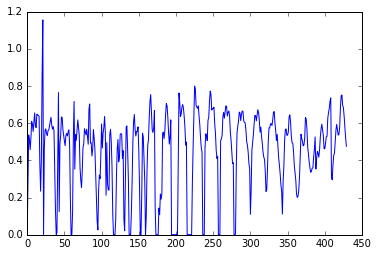

In [12]:
plt.plot(aerosols[2])

292 4231
0.54403826838


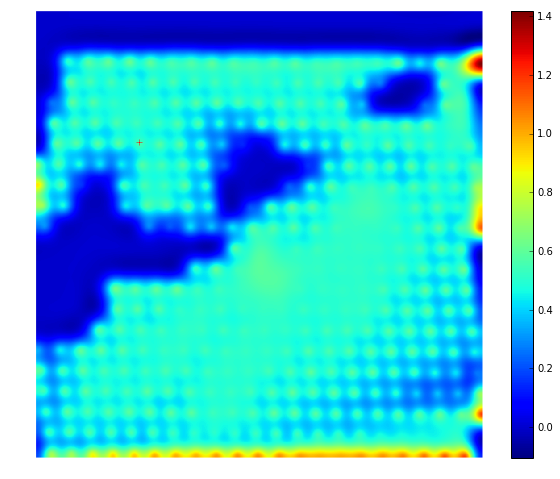

In [10]:
data = parallel_rw_pkl(None, 'USGS0321_atm', 'r')
lat, lon =35.215,-111.63389
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
print imgx,imgy
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-(imgx/1000)*1000).astype(int), (aerosols[1]-(imgy/1000)*1000).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, isrobust=True)
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(imgy-(imgy/1000)*1000,imgx-(imgx/1000)*1000,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()
print (sm_aaro[0]*10)[imgx-(imgx/1000)*1000,imgy-(imgy/1000)*1000]

In [9]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160304_160321_USGS_Flagstaff_ROLO.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,06:03:2016,15:45:46,66.656782,0.011456,0.021040,0.021494,0.023297,NaN,NaN,NaN,NaN,NaN,0.036346,NaN,NaN,0.043105,NaN,0.048292,0.043175,0.738800
1,06:03:2016,20:50:12,66.868194,0.024929,0.036594,0.039780,0.044198,NaN,NaN,NaN,NaN,NaN,0.063287,NaN,NaN,0.071243,NaN,0.080655,0.073577,0.573431
2,06:03:2016,22:49:58,66.951366,0.030572,0.042854,0.046438,0.050671,NaN,NaN,NaN,NaN,NaN,0.066444,NaN,NaN,0.074281,NaN,0.082113,0.078577,0.454611
3,06:03:2016,23:10:00,66.965278,0.036214,0.048602,0.051784,0.055581,NaN,NaN,NaN,NaN,NaN,0.070527,NaN,NaN,0.078268,NaN,0.087907,0.085380,0.460483
4,08:03:2016,15:05:37,68.628900,0.020946,0.034377,0.031412,0.035177,NaN,NaN,NaN,NaN,NaN,0.044373,NaN,NaN,0.048464,NaN,0.049548,0.046019,0.378544
5,08:03:2016,15:42:15,68.654340,0.019633,0.032940,0.030299,0.033627,NaN,NaN,NaN,NaN,NaN,0.042663,NaN,NaN,0.046035,NaN,0.046958,0.041135,0.367332
6,08:03:2016,16:39:09,68.693854,0.020813,0.035319,0.032175,0.035542,NaN,NaN,NaN,NaN,NaN,0.045514,NaN,NaN,0.048294,NaN,0.049594,0.041380,0.375065
7,08:03:2016,16:58:57,68.707604,0.021402,0.036799,0.033457,0.036964,NaN,NaN,NaN,NaN,NaN,0.047747,NaN,NaN,0.050428,NaN,0.051740,0.042488,0.389074
8,08:03:2016,18:49:22,68.784282,0.023846,0.039458,0.037162,0.041017,NaN,NaN,NaN,NaN,NaN,0.052851,NaN,NaN,0.054829,NaN,0.056195,0.043683,0.414666
9,08:03:2016,20:49:36,68.867778,0.022462,0.037272,0.037358,0.041864,NaN,NaN,NaN,NaN,NaN,0.054629,NaN,NaN,0.057024,NaN,0.059265,0.048027,0.355627


In [ ]:
0.0201514343421, 0.032